### Basic Kaggle cell to load data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-subscription-price-in-different-countries/Netflix subscription fee Dec-2021.csv
/kaggle/input/netflix-subscription-price-in-different-countries/netflix price in different countries.csv


# Netflix Subscription Fee 
The Data gives an overview of the subscription fee and library size of netflix's platform present in 65 nations.
Lets explore which countries get the most bang out of their buck in terms of shows and movies!

## Importing Major libraries required

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

import re
import matplotlib

import statistics

### Loading Data to pandas


In [3]:
netflix_source = pd.read_csv('/kaggle/input/netflix-subscription-price-in-different-countries/Netflix subscription fee Dec-2021.csv',header = 0)
netflix_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


In [4]:
netflix_source.head(5)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [5]:
netflix_source.sort_values(by = 'Cost Per Month - Standard ($)',ascending = False)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
56,ch,Switzerland,5506,3654,1852,12.88,20.46,26.96
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
17,fr,France,5445,3604,1841,10.16,15.24,20.32
29,il,Israel,5713,3650,2063,10.56,15.05,19.54
...,...,...,...,...,...,...,...,...
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93
26,in,India,5843,3718,2125,2.64,6.61,8.60
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26


## Analysing the Cost
Considering basic costs only as all users with this subscription can still access all content, just at lower qualities and on lesser devices.
We will look at the library size for 1 dollar worth of subscription fee to get a better comparison. 

In [6]:
netflix_source['Library for 1 dollar/month'] = netflix_source['Total Library Size']/netflix_source['Cost Per Month - Basic ($)'] 


In [7]:
netflix_source.head(5)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Library for 1 dollar/month
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,1272.727273
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,779.846939
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,624.584718
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,491.141732
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,624.655820


Now lets look at the countries with most cost effective subscription fees.

## Nations with the cheapest effective subscription fees

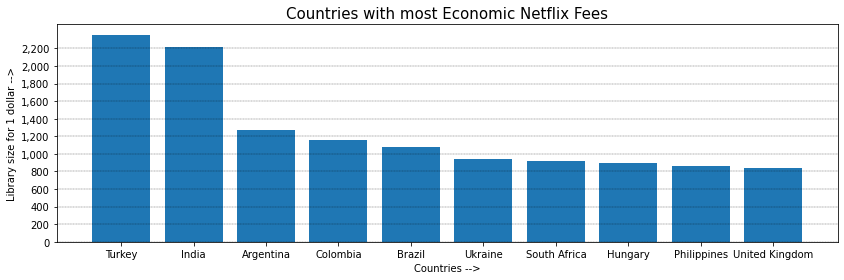

In [8]:
fig, ax = plt.subplots(figsize = (14,4))

ax.bar(netflix_source.sort_values(by = 'Library for 1 dollar/month',ascending = False)['Country'].head(10),netflix_source.sort_values(by = 'Library for 1 dollar/month',ascending = False)['Library for 1 dollar/month'].head(10))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.grid(color='black', linestyle='--', linewidth= 0.3)
ax.set_title('Countries with most Economic Netflix Fees',fontsize = 15)
ax.set_xlabel('Countries -->',fontsize = 10)
ax.set_ylabel('Library size for 1 dollar -->' , fontsize = 10)

max_val = netflix_source["Library for 1 dollar/month"].sort_values(ascending = False)
upper_bound = max_val.head(1).values
ticker = 50
for i in range(50,500,50):
    if upper_bound/i > 10: 
        ticker = i
plt.yticks(np.arange(0,upper_bound,ticker))
plt.show()

And now the most costly countries

## Nations with the most expensive effective subscription fees

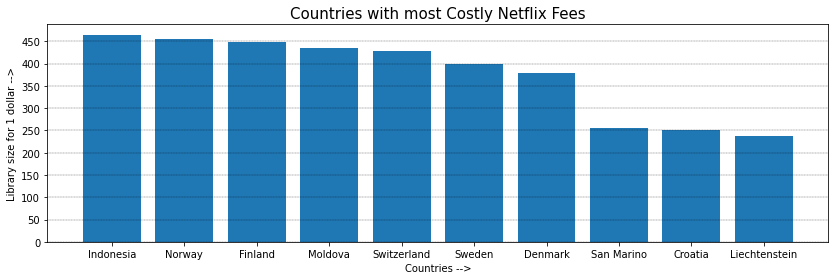

In [9]:
fig, ax = plt.subplots(figsize = (14,4))

ax.bar(netflix_source.sort_values(by = 'Library for 1 dollar/month',ascending = False)['Country'].tail(10),netflix_source.sort_values(by = 'Library for 1 dollar/month',ascending = False)['Library for 1 dollar/month'].tail(10))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.grid(color='black', linestyle='--', linewidth= 0.3)
ax.set_title('Countries with most Costly Netflix Fees',fontsize = 15)
ax.set_xlabel('Countries -->',fontsize = 10)
ax.set_ylabel('Library size for 1 dollar -->' , fontsize = 10)

max_val = netflix_source["Library for 1 dollar/month"].sort_values(ascending = False).tail(10)
upper_bound = max_val.head(1).values
ticker = 50
for i in range(50,500,50):
    if upper_bound/i > 10: 
        ticker = i
plt.yticks(np.arange(0,upper_bound,ticker))
plt.show()

Most of these nations are economically very rich (Liechtenstein is often tagged as the richest based on per capita GDP). However, its interesting to see relatively middle income nations such as Croatia, Indonesia and Moldova here. <br/>
This difference may not be just because of actions from Netflix's side though. Some countries may be censoring a few shows bringing down the total available library size. <br/>
For completeness, lets see if there is a major difference if we directly compare absolute costs of fees.



## Nations with Lowest Absolute Basic Fees

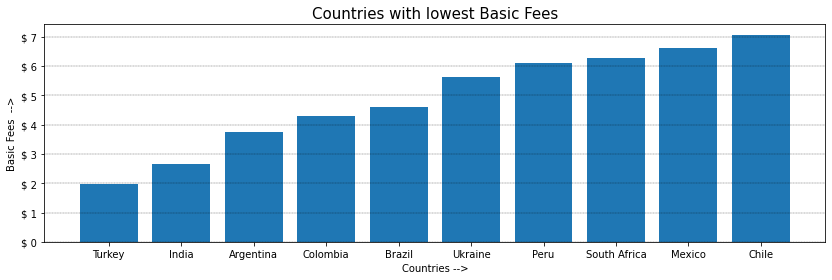

In [10]:
fig, ax = plt.subplots(figsize = (14,4))

ax.bar(netflix_source.sort_values(by = 'Cost Per Month - Basic ($)',ascending = True)['Country'].head(10),netflix_source.sort_values(by = 'Cost Per Month - Basic ($)',ascending = True)['Cost Per Month - Basic ($)'].head(10))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('$ {x:,.0f}'))
ax.yaxis.grid(color='black', linestyle='--', linewidth= 0.3)
ax.set_title('Countries with lowest Basic Fees',fontsize = 15)
ax.set_xlabel('Countries -->',fontsize = 10)
ax.set_ylabel('Basic Fees  -->' , fontsize = 10)

plt.yticks(np.arange(0,8,1))
plt.show()

## Nations with Highest Netflix Basic Fees

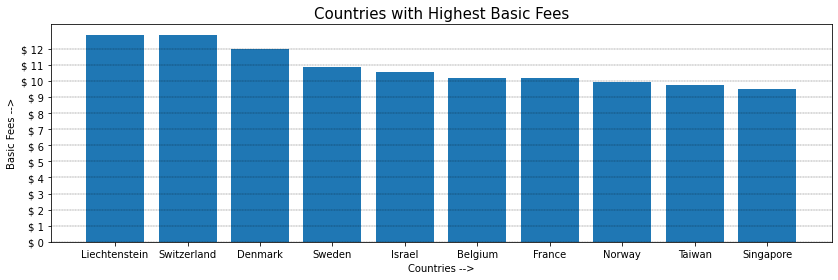

In [11]:
fig, ax = plt.subplots(figsize = (14,4))

ax.bar(netflix_source.sort_values(by = 'Cost Per Month - Basic ($)',ascending = False)['Country'].head(10),netflix_source.sort_values(by = 'Cost Per Month - Basic ($)',ascending = False)['Cost Per Month - Basic ($)'].head(10))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('$ {x:,.0f}'))
ax.yaxis.grid(color='black', linestyle='--', linewidth= 0.3)
ax.set_title('Countries with Highest Basic Fees',fontsize = 15)
ax.set_xlabel('Countries -->',fontsize = 10)
ax.set_ylabel('Basic Fees -->' , fontsize = 10)

max_val = netflix_source["Cost Per Month - Basic ($)"].sort_values(ascending = False)
upper_bound = max_val.head(1).values
ticker = 1
for i in range(1,50,1):
    if upper_bound/i > 10: 
        ticker = i
plt.yticks(np.arange(0,upper_bound,ticker))
plt.show()

We see lots of the old names repeating in both charts. I would personally recommend considering the total volume of shows available along with the basic fees cost, i.e, the first analysis. <br/>

Lets finish this Section with a scatter plot



Statistics
The Average Value for Basic Fees : 8.368461538461538
Standard Deviation for Basic Fees : 1.9378187082784204
The Average Value for Library Size : 5314.415384615385
Standard Deviation for Library Size : 980.3226333124292


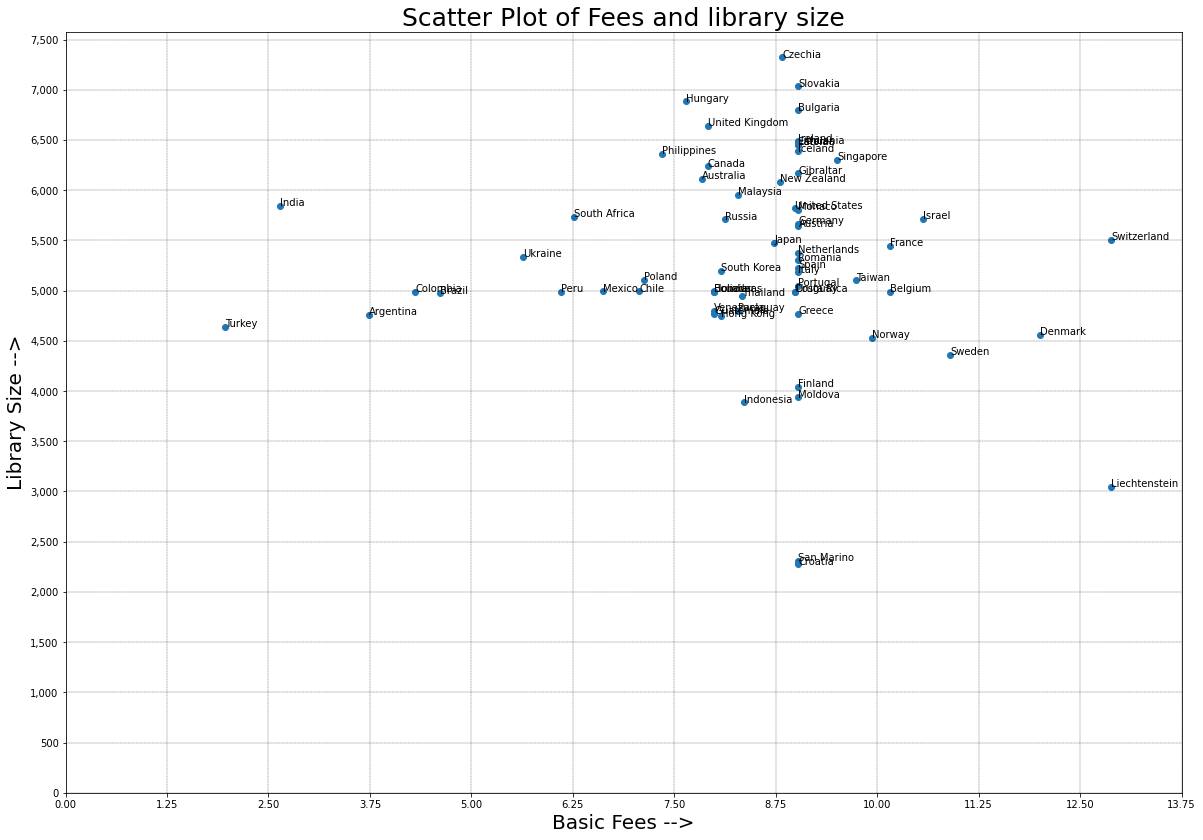

In [12]:
print("Statistics")
print("The Average Value for Basic Fees : " + str(statistics.mean(netflix_source['Cost Per Month - Basic ($)'])))
print("Standard Deviation for Basic Fees : " + str(statistics.stdev(netflix_source['Cost Per Month - Basic ($)'])) )
print("The Average Value for Library Size : " + str(statistics.mean(netflix_source['Total Library Size'])))
print("Standard Deviation for Library Size : " + str(statistics.stdev(netflix_source['Total Library Size'])) )


fig, ax = plt.subplots(figsize = (20,14))
ax.scatter(netflix_source['Cost Per Month - Basic ($)'], netflix_source['Total Library Size'])

for i, ctry in enumerate(netflix_source['Country']):
    ax.annotate(ctry, (netflix_source['Cost Per Month - Basic ($)'][i], netflix_source['Total Library Size'][i]))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.00f}'))
ax.yaxis.grid(color='black', linestyle='--', linewidth= 0.3)
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.02f}'))
ax.xaxis.grid(color='black', linestyle='--', linewidth= 0.3)

ax.set_title('Scatter Plot of Fees and library size',fontsize = 25)
ax.set_xlabel('Basic Fees -->',fontsize = 20)
ax.set_ylabel('Library Size -->' , fontsize = 20)
plt.yticks(np.arange(0,8000,500))
plt.xticks(np.arange(0,15,1.25))
plt.show()

The records near the central tendency are tough to see clearly. There might be a python package for fixing the same called "adjusttext".https://github.com/Phlya/adjustText. I plan to explore this as a next step. Never the less we can use this chart to look for outliers, like India and Turkey <br/>

Now lets see if there is a difference in the ratio of standard fee to basic fee among countries.

## Fee Tier Jumps

In [13]:
#Cost Per Month - Basic ($)	Cost Per Month - Standard ($)	Cost Per Month - Premium ($)
netflix_source['Basic to Standard Jump'] = netflix_source['Cost Per Month - Standard ($)']/netflix_source['Cost Per Month - Basic ($)']
netflix_source['Standard to Premium Jump'] = netflix_source['Cost Per Month - Premium ($)']/netflix_source['Cost Per Month - Standard ($)']
netflix_source.head(5)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Library for 1 dollar/month,Basic to Standard Jump,Standard to Premium Jump
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,1272.727273,1.684492,1.469841
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,779.846939,1.545918,1.352310
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,624.584718,1.624585,1.385140
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,491.141732,1.500000,1.333333
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,624.655820,1.375469,1.272975


Interesting! It appears that there is a sizable difference in these tier jumps. Lets compare standard tier jumps.

## Nations with largest Basic to Standard Tier Jump

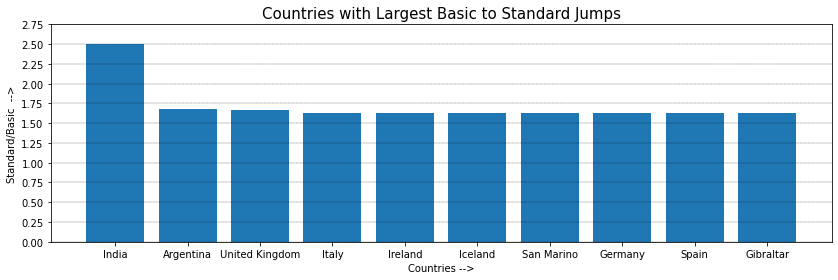

In [14]:
fig, ax = plt.subplots(figsize = (14,4))

ax.bar(netflix_source.sort_values(by = 'Basic to Standard Jump',ascending = False)['Country'].head(10),netflix_source.sort_values(by = 'Basic to Standard Jump',ascending = False)['Basic to Standard Jump'].head(10))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.02f}'))
ax.yaxis.grid(color='black', linestyle='--', linewidth= 0.3)
ax.set_title('Countries with Largest Basic to Standard Jumps',fontsize = 15)
ax.set_xlabel('Countries -->',fontsize = 10)
ax.set_ylabel('Standard/Basic  -->' , fontsize = 10)

plt.yticks(np.arange(0,3,0.25))
plt.show()

Most range near 1.6 but Indians seem to be paying a sizable amount more for their standard fees! Lets look at the absolute numbers for India.

In [15]:
netflix_source[netflix_source['Country']=='India']

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Library for 1 dollar/month,Basic to Standard Jump,Standard to Premium Jump
26,in,India,5843,3718,2125,2.64,6.61,8.6,2213.257576,2.503788,1.301059


## Nations with smallest Basic to Standard Tier Jump

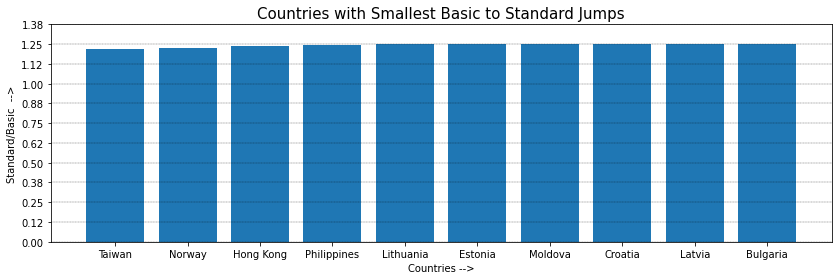

In [16]:
fig, ax = plt.subplots(figsize = (14,4))

ax.bar(netflix_source.sort_values(by = 'Basic to Standard Jump',ascending = True)['Country'].head(10),netflix_source.sort_values(by = 'Basic to Standard Jump',ascending = True)['Basic to Standard Jump'].head(10))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.02f}'))
ax.yaxis.grid(color='black', linestyle='--', linewidth= 0.3)
ax.set_title('Countries with Smallest Basic to Standard Jumps',fontsize = 15)
ax.set_xlabel('Countries -->',fontsize = 10)
ax.set_ylabel('Standard/Basic  -->' , fontsize = 10)

plt.yticks(np.arange(0,1.5,0.125))
plt.show()

Lets close this section with a scatter plot of the ratios.

Statistics
The Average Value for Standard Jumps : 1.44981490872182
Standard Deviation for Standard Jumps : 0.19262201431054654
The Average Value for Premium Jumps : 1.299954661913182
Standard Deviation for Premium Jumps : 0.075084395700759


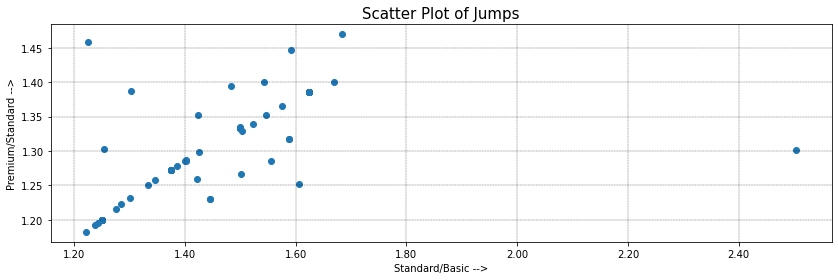

In [17]:
print("Statistics")
print("The Average Value for Standard Jumps : " + str(statistics.mean(netflix_source['Basic to Standard Jump'])))
print("Standard Deviation for Standard Jumps : " + str(statistics.stdev(netflix_source['Basic to Standard Jump'])) )
print("The Average Value for Premium Jumps : " + str(statistics.mean(netflix_source['Standard to Premium Jump'])))
print("Standard Deviation for Premium Jumps : " + str(statistics.stdev(netflix_source['Standard to Premium Jump'])) )

fig, ax = plt.subplots(figsize = (14,4))
ax.scatter(netflix_source['Basic to Standard Jump'], netflix_source['Standard to Premium Jump'])

#for i, ctry in enumerate(netflix_source['Country']):
#    ax.annotate(ctry, (netflix_source['Basic to Standard Jump'][i], netflix_source['Standard to Premium Jump'][i]))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.02f}'))
ax.yaxis.grid(color='black', linestyle='--', linewidth= 0.3)
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.02f}'))
ax.xaxis.grid(color='black', linestyle='--', linewidth= 0.3)

ax.set_title('Scatter Plot of Jumps',fontsize = 15)
ax.set_xlabel('Standard/Basic -->',fontsize = 10)
ax.set_ylabel('Premium/Standard -->' , fontsize = 10)
plt.show()

Most nations follow a 1 to 1 mapping between jumps, i.e., jump ratios are similar for both premium and standard. India is a major exception. To get the labels for outliers, simply uncomment the annonate code present in the cell. <br/>
PS : This will lead to overlapping labels for records near the central tendency.